In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored as cl
import seaborn as sns
from matplotlib import style
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from openpyxl import load_workbook
import seaborn as sns

In [2]:
D1509=pd.read_csv('China statistic 2015-2019\E1509.csv')

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
D1509

Market Cate gory-  \
0                                               Total   
1                                     General Markets   
2                     Production Comprehensive Market   
3         Industrial Consumable Comprehensive Markets   
4                  Farm Produce Comprehensive Markets   
5                         Other Comprehensive Markets   
6                                 Specialized Markets   
7                     Markets for Means of Production   
8       Markets for Agricultural Production Equipment   
9        Markets for Means of Agricultural Production   
10                          Coal and Charcoal Markets   
11                                       Wood Markets   
12                          Building Material Markets   
13            Chemical Materials and Products Markets   
14                            Metal Materials Markets   
15                       Mechanical Equipment Markets   
16                                             Others   
17                               Farm Produce Markets   
18                              Grain and Oil Markets   
19                     Meat. Poultry and Eggs Markets   
20                           Aquatic Products Markets   
21                                 Vegetables Markets   
22          Dried and Fresh Melons and Fruits Markets   
23    Markets for Cotton. Local & Livestock Products.   
24                                 and Tobacco Leaves   
25                                             Others   
26    Markets for Food. Beverages. Tobacco and Liquor   
27                         Food and Beverages Markets   
28                                        Tea Markets   
29                         Tobacco and Liquor Markets   
30                                             Others   
31     Markets for Textiles. Clothing. Shoes and Hats   
32                         Cloth and Textiles Markets   
33                                   Clothing Markets   
34                             Shoes and Hats Markets   
35                                             Others   
36  Markets for Daily Use Articles and Cultural Goods   
37                          Small Merchandise Markets   
38                                    Luggage Markets   
39                                       Toys Markets   
40                                Stationary7 Markets   
41        Markets for Books. Newspapers and Magazines   
42              Markets for Video and E-book Products   
43                             Sports Article Markets   
44                                             Others   
45                        Gold. Jewelry, Jade Markets   
46  Markets for Electrical Appliances. Communicati...   
47                       Household Appliances Markets   
48                   Communication Appliances Markets   
49               Cameras and Video Equipments Markets   
50          Computer and Auxiliary Equipments Markets   
51                                             Others   
52  Markets for Medicine. Medical Materials and\nM...   
53                           Chinese Medicine Markets   
54                                             Others   
55  Markets for Furniture. Hardware and\nDecoratio...   
56                                  Furniture Markets   
57                       Decoration Materials Markets   
58                                      Lamps Markets   
59  Markets for Kitchen Utensils and\nWashing Equi...   
60                         Hardware Materials Markets   
61                                             Others   
62      Markets for Cars. Motorcycles and Spare Parts   
63                                       Cars Markets   
64                                Motorcycles Markets   
65                        Vehicle Spare Parts Markets   
66         Markets for Flower. Bird. Fish and Insects   
67                                     Flower Markets   
68                                       Bird Markets   
69                       Markets for Fish for 

In [4]:
GM=D1509[2:6]

In [5]:
name = ['Production Comprehensive Market','Industrial Consumable Comprehensive Markets','Farm Produce Comprehensive Markets','Other Comprehensive Markets']
GM['Number\nof\nMarkets\n(unit)'].plot(kind='pie',subplots=True,autopct='%1.1f%%'
                                      ,labels=name,title='Number of Markets in General',legend=False,ylabel='')


array([<AxesSubplot:>], dtype=object)

In [6]:
SpM=D1509.loc(axis=0)[7,17,26,31,36,45,46,52,55,62,66,71,75]

array([<AxesSubplot:>], dtype=object)

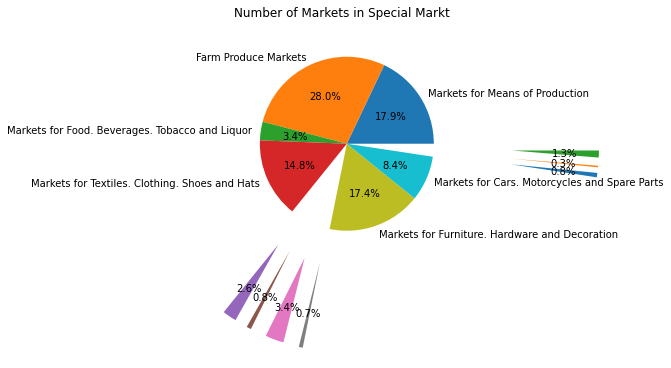

In [7]:
name = ['Markets for Means of Production','Farm Produce Markets','Markets for Food. Beverages. Tobacco and Liquor','Markets for Textiles. Clothing. Shoes and Hats'
        ,' ',' ',' '
        ,' ','Markets for Furniture. Hardware and Decoration','Markets for Cars. Motorcycles and Spare Parts'
        ,' ',' ',' ']
SpM['Number\nof\nMarkets\n(unit)'].plot(kind='pie',subplots=True,autopct='%1.1f%%'
                                      ,labels=name,title='Number of Markets in Special Markt',legend=False,ylabel='',
                                       explode=(0,0,0,0,1.4,1.4,1.4,1.4,0,0,1.9,1.9,1.9))


In [8]:
GV=D1509.loc(axis=0)[1,6]

In [9]:
name=['General Market','Special Martket']
GV=GV['Turnover\n(100\nmillion\nyuan)'].astype(float)

array([<AxesSubplot:>], dtype=object)

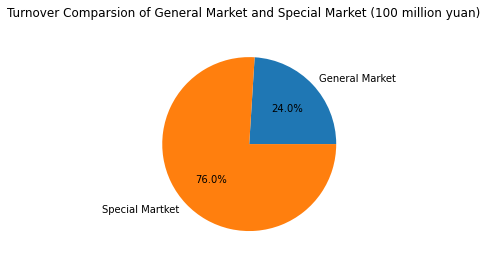

In [10]:
GV.plot(kind='pie',subplots=True,autopct='%1.1f%%'
                                      ,labels=name,title='Turnover Comparsion of General Market and Special Market (100 million yuan)',legend=False,ylabel=''
                                       )

In [11]:
Total=D1509[0:1]

In [12]:
name=['Wholesale','Retail']
TotalWR=[98733.4,13283.4]
TotalWR=pd.DataFrame(TotalWR)
TotalWR.plot(kind='pie',subplots=True,autopct='%1.1f%%'
                                      ,labels=name,title='Comparsion of Wholesale and Retial',legend=False,ylabel=''
                                       )

array([<AxesSubplot:>], dtype=object)

In [13]:
GSg =D1509.loc(axis=0)[1,6]
del GSg['Market Cate gory-']
GSg=GSg.astype(float)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

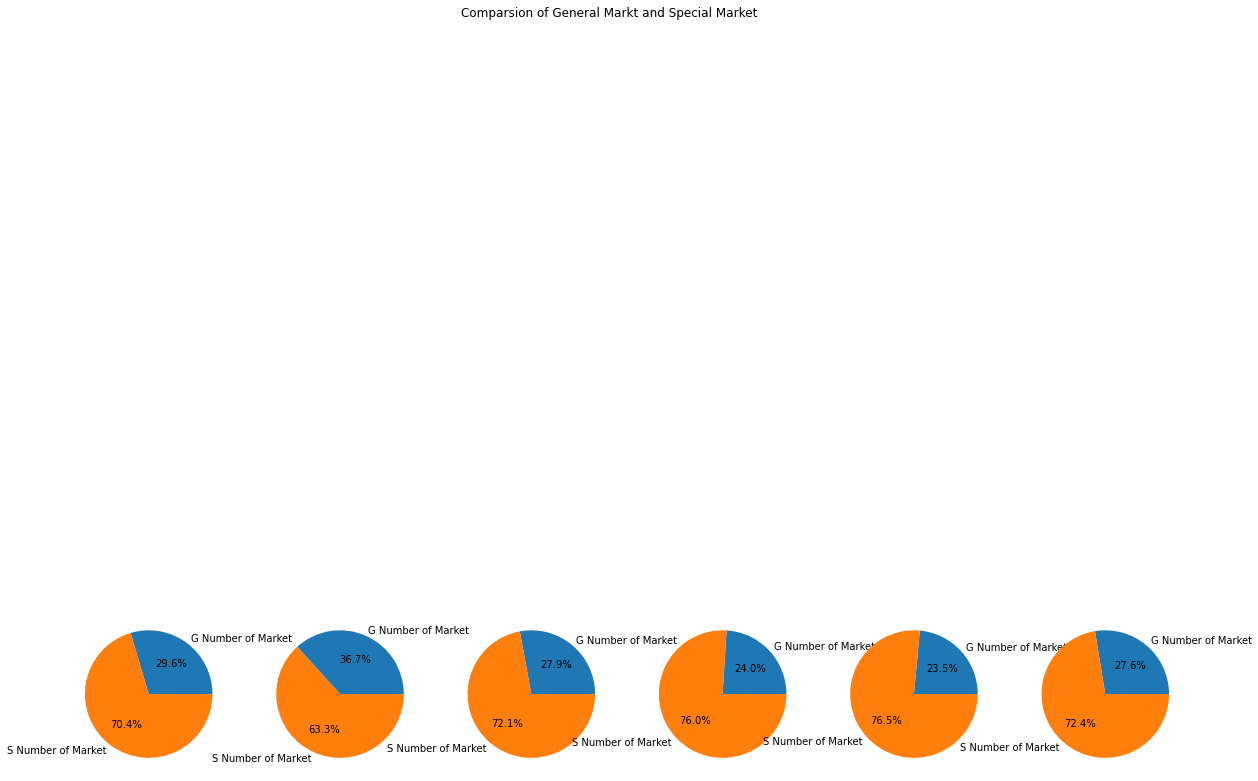

In [14]:
name=['G Number of Market','S Number of Market','G Number of Booths','S Number of Booths'
      'G Operating Area','S Opersating Area','G Turnover','S Turnover','GT Wholesale','ST Wholesale']
GSg.plot(kind='pie',subplots=True,autopct='%1.1f%%'
                                      ,labels=name,title='Comparsion of General Markt and Special Market',legend=False,ylabel=''
                                       ,figsize=(20,20))

In [15]:
#Define the average profit of per Booths in GM
GMdata=GM
del GMdata['Market Cate gory-']
GMdata=GMdata.astype('float')

In [16]:
#Per Booths average profit(PBP)
PBP=[]
for i in range(len(GMdata)):
    PBP.insert(i,GMdata.loc[i+2,'Turnover\n(100\nmillion\nyuan)']/GMdata.loc[i+2,'Number\nof\nBooths\n(unit)'])


In [17]:
#Define the average profit of per Market
#Per market average profit (PMP)
PMP=[]
for i in range(len(GMdata)):
    PMP.insert(i,GMdata.loc[i+2,'Turnover\n(100\nmillion\nyuan)']/GMdata.loc[i+2,'Number\nof\nMarkets\n(unit)'])


In [18]:

#Graph of PBP
yAxis=[10,20,30,40]
labels=['Production Comprehensive Market','Industrial Consumable Comprehensive Markets'
        ,'Farm Produce Comprehensive Markets','Other Comprehensive Markets']
plt.barh(yAxis,PBP,tick_label=labels,height=5)
plt.xticks(rotation=45)

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

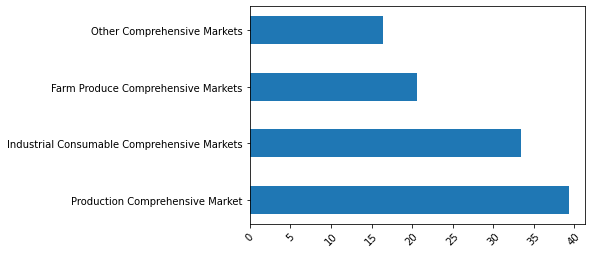

In [19]:

#Graph of PMP
yAxis=[10,20,30,40]
labels=['Production Comprehensive Market','Industrial Consumable Comprehensive Markets'
        ,'Farm Produce Comprehensive Markets','Other Comprehensive Markets']
plt.barh(yAxis,PMP,tick_label=labels,height=5)
plt.xticks(rotation=45)

In [20]:
#################### In SM analysis the PBP & PMP

In [21]:
#Define the average profit of per Booths in SM
SMdata=SpM
del SMdata['Market Cate gory-']
SMdata=SMdata.astype('float')
smPBP=[]
for i in SMdata.index.values:
    smPBP.insert(i,SMdata.loc[i,'Turnover\n(100\nmillion\nyuan)']/SMdata.loc[i,'Number\nof\nBooths\n(unit)'])


In [22]:
#Define the average profit of per Market
#Per market average profit (PMP)
smPMP=[]
for i in SMdata.index.values:
    smPMP.insert(i,SMdata.loc[i,'Turnover\n(100\nmillion\nyuan)']/SMdata.loc[i,'Number\nof\nMarkets\n(unit)'])


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

C:\Users\AllenVlen\anaconda3_1\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AllenVlen\anaconda3_1\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


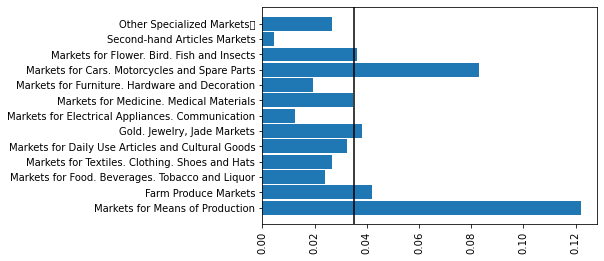

In [23]:
#Graph of smPBP
yAxis=[10,20,30,40,50,60,70,80,90,100,110,120,130]
labels= ['Markets for Means of Production','Farm Produce Markets','Markets for Food. Beverages. Tobacco and Liquor','Markets for Textiles. Clothing. Shoes and Hats'
        ,'Markets for Daily Use Articles and Cultural Goods','Gold. Jewelry, Jade Markets','Markets for Electrical Appliances. Communication'
        ,'Markets for Medicine. Medical Materials','Markets for Furniture. Hardware and Decoration','Markets for Cars. Motorcycles and Spare Parts'
        ,'Markets for Flower. Bird. Fish and Insects','Second-hand Articles Markets','Other Specialized Markets	']
plt.barh(yAxis,smPBP,tick_label=labels,height=9)
plt.axvline(0.035,color="k")
plt.xticks(rotation=90)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

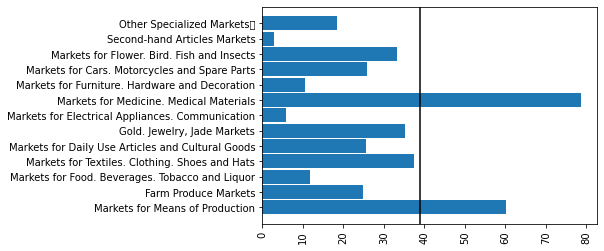

In [24]:
#Graph of smPMP
yAxis=[10,20,30,40,50,60,70,80,90,100,110,120,130]
labels= ['Markets for Means of Production','Farm Produce Markets','Markets for Food. Beverages. Tobacco and Liquor','Markets for Textiles. Clothing. Shoes and Hats'
        ,'Markets for Daily Use Articles and Cultural Goods','Gold. Jewelry, Jade Markets','Markets for Electrical Appliances. Communication'
        ,'Markets for Medicine. Medical Materials','Markets for Furniture. Hardware and Decoration','Markets for Cars. Motorcycles and Spare Parts'
        ,'Markets for Flower. Bird. Fish and Insects','Second-hand Articles Markets','Other Specialized Markets	']
plt.barh(yAxis,smPMP,tick_label=labels,height=9)
plt.axvline(39,color="k")
plt.xticks(rotation=90)